# **Import**

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [60]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import shap

# **Data Load**

In [12]:
cd /content/drive/MyDrive/[Projects]/Dacon/운수종사자 인지적 특성 데이터를 활용한 교통사고 위험 예측 AI 경진대회/Data

/content/drive/MyDrive/[Projects]/Dacon/운수종사자 인지적 특성 데이터를 활용한 교통사고 위험 예측 AI 경진대회/Data


In [17]:
train_b = pd.read_csv('./train_b.csv')
train_b.head()

,Test_id,Test_x,Label,Test_y,PrimaryKey,Age,TestDate,B1-1,B1-2,B1-3,...,B9-2,B9-3,B9-4,B9-5,B10-1,B10-2,B10-3,B10-4,B10-5,B10-6
0,0xD5BB9FA4D3BC42EE494BD670F004564CB04A0DF8F819...,B,0,B,0xD5BB9FA4D3BC42EE494BD670F004564CB04A0DF8F819...,60b,201912,"1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","2,4,4,2,4,4,2,2,4,2,2,4,2,4,4,2",...,0,1,34,0,20,0,2,58,0,20
1,0x689BA0A725996D44C81AF62BA981E35E1CAC54E2D85A...,B,0,B,0x689BA0A725996D44C81AF62BA981E35E1CAC54E2D85A...,60b,202002,"1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1","0,0,0.7208771,0,0.6820285,0,0.6655249,0,0.6622...","4,4,1,4,1,4,1,4,1,1,4,1,4,4,1,1",...,0,0,35,0,20,0,1,59,3,20
2,0x52908018D663ECD95A5B3F53822F28DA755E7F4A3453...,B,0,B,0x52908018D663ECD95A5B3F53822F28DA755E7F4A3453...,60b,202205,"1,1,1,2,1,1,2,1,2,1,1,1,1,1,1,1","0.6172074,0,0,0.5502462,0,0,0.6004377,1.117857...","1,4,4,1,4,4,1,1,4,1,1,4,1,4,4,1",...,0,1,34,1,20,0,1,59,2,18
3,0x8301C9E89A886F3461F2513473B6DFA6CCF3D2A90FF9...,B,0,B,0x8301C9E89A886F3461F2513473B6DFA6CCF3D2A90FF9...,70b,202210,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0.947294,0,0.7391879,0,0.5613896,0,0.52969...","4,4,1,4,1,4,1,4,1,2,4,1,4,4,1,1",...,0,0,35,0,18,2,0,60,5,19
4,0x800A6AE66459B67FB0A249B0CF8EA39E19B014A920BF...,B,0,B,0x800A6AE66459B67FB0A249B0CF8EA39E19B014A920BF...,70a,202103,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","2,4,4,4,2,4,2,4,2,2,4,4,2,2,2,4",...,0,2,33,0,20,0,0,60,0,19


In [18]:
train_b = train_b.drop('Test_y', axis=1)

In [19]:
train_b.rename(columns={
    'Test_x': 'Test',

    'B1-1': 'B1_Response1',
    'B1-2': 'B1_ResponseTime',
    'B1-3': 'B1_Response2',

    'B2-1': 'B2_Response1',
    'B2-2': 'B2_ResponseTime',
    'B2-3': 'B2_Response2',

    'B3-1': 'B3_Response',
    'B3-2': 'B3_ResponseTime',

    'B4-1': 'B4_Response',
    'B4-2': 'B4_ResponseTime',

    'B5-1': 'B5_Response',
    'B5-2': 'B5_ResponseTime',

    'B6': 'B6_Response',
    'B7': 'B7_Response',

    'B8': 'B8_Response',

    'B9-1': 'B9_Count1',
    'B9-2': 'B9_Count2',
    'B9-3': 'B9_Count3',
    'B9-4': 'B9_Count4',
    'B9-5': 'B9_Count5',

    'B10-1': 'B10_Count1',
    'B10-2': 'B10_Count2',
    'B10-3': 'B10_Count3',
    'B10-4': 'B10_Count4',
    'B10-5': 'B10_Count5',
    'B10-6': 'B10_Count6'

}, inplace=True)

In [20]:
train_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Test_id          297526 non-null  object
 1   Test             297526 non-null  object
 2   Label            297526 non-null  int64 
 3   PrimaryKey       297526 non-null  object
 4   Age              297526 non-null  object
 5   TestDate         297526 non-null  int64 
 6   B1_Response1     297517 non-null  object
 7   B1_ResponseTime  297517 non-null  object
 8   B1_Response2     297517 non-null  object
 9   B2_Response1     297523 non-null  object
 10  B2_ResponseTime  297523 non-null  object
 11  B2_Response2     297523 non-null  object
 12  B3_Response      297523 non-null  object
 13  B3_ResponseTime  297523 non-null  object
 14  B4_Response      297523 non-null  object
 15  B4_ResponseTime  297523 non-null  object
 16  B5_Response      297523 non-null  object
 17  B5_Respons

In [21]:
train_b.to_csv('train_b_renamed.csv', index=False)

In [32]:
train_b = pd.read_csv('./train_b_renamed.csv')
train_b = train_b.dropna()
train_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297513 entries, 0 to 297525
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Test_id          297513 non-null  object
 1   Test             297513 non-null  object
 2   Label            297513 non-null  int64 
 3   PrimaryKey       297513 non-null  object
 4   Age              297513 non-null  object
 5   TestDate         297513 non-null  int64 
 6   B1_Response1     297513 non-null  object
 7   B1_ResponseTime  297513 non-null  object
 8   B1_Response2     297513 non-null  object
 9   B2_Response1     297513 non-null  object
 10  B2_ResponseTime  297513 non-null  object
 11  B2_Response2     297513 non-null  object
 12  B3_Response      297513 non-null  object
 13  B3_ResponseTime  297513 non-null  object
 14  B4_Response      297513 non-null  object
 15  B4_ResponseTime  297513 non-null  object
 16  B5_Response      297513 non-null  object
 17  B5_ResponseTime

# **Features**

In [33]:
train_b.columns

Index(['Test_id', 'Test', 'Label', 'PrimaryKey', 'Age', 'TestDate',
       'B1_Response1', 'B1_ResponseTime', 'B1_Response2', 'B2_Response1',
       'B2_ResponseTime', 'B2_Response2', 'B3_Response', 'B3_ResponseTime',
       'B4_Response', 'B4_ResponseTime', 'B5_Response', 'B5_ResponseTime',
       'B6_Response', 'B7_Response', 'B8_Response', 'B9_Count1', 'B9_Count2',
       'B9_Count3', 'B9_Count4', 'B9_Count5', 'B10_Count1', 'B10_Count2',
       'B10_Count3', 'B10_Count4', 'B10_Count5', 'B10_Count6'],
      dtype='object')

In [34]:
list_cols = ['B1_Response1', 'B1_ResponseTime', 'B1_Response2', 'B2_Response1',
       'B2_ResponseTime', 'B2_Response2', 'B3_Response', 'B3_ResponseTime',
       'B4_Response', 'B4_ResponseTime', 'B5_Response', 'B5_ResponseTime',
       'B6_Response', 'B7_Response', 'B8_Response']

for col in list_cols:
    train_b[col + '_list'] = train_b[col].apply(
        lambda x: list(map(float, x.split(','))) if isinstance(x, str) else x
    )

In [35]:
def compute_B1_features(row):
    r1 = row.get('B1_Response1_list', []) or []
    rt = row.get('B1_ResponseTime_list', []) or []
    r2 = row.get('B1_Response2_list', []) or []

    L = min(len(r1), len(rt), len(r2))
    if L == 0:
        return pd.Series({
            'B1_task1_accuracy': 0,
            'B1_task2_change_acc': 0,
            'B1_task2_non_change_acc': 0,
            'B1_task2_accuracy_gap': 0,
            'B1_task2_mean_rt': np.nan
        })

    r1, r2, rt = np.array(r1[:L]), np.array(r2[:L]), np.array(rt[:L])

    # 1과제 정답률
    r1_bin = np.array([1 if val == 1 else 0 for val in r1])
    B1_task1_accuracy = r1_bin.mean()

    # 2과제: change / non-change 정확도
    r2_bin = np.array([1 if val == 1 else 0 for val in r2])
    change_mask = np.arange(L) < L//2        # 앞 절반이 change
    non_change_mask = np.arange(L) >= L//2   # 뒤 절반이 non-change

    B1_task2_change_acc = r2_bin[change_mask].mean() if np.any(change_mask) else 0
    B1_task2_non_change_acc = r2_bin[non_change_mask].mean() if np.any(non_change_mask) else 0

    # 정확도 차
    B1_task2_accuracy_gap = B1_task2_change_acc - B1_task2_non_change_acc

    # 2과제 평균 반응시간 (응답한 trial만)
    valid_rt = rt[r2_bin == 1]
    B1_task2_mean_rt = valid_rt.mean() if len(valid_rt) > 0 else np.nan

    return pd.Series({
        'B1_task1_accuracy': B1_task1_accuracy,
        'B1_task2_change_acc': B1_task2_change_acc,
        'B1_task2_non_change_acc': B1_task2_non_change_acc,
        'B1_task2_accuracy_gap': B1_task2_accuracy_gap,
        'B1_task2_mean_rt': B1_task2_mean_rt
    })

# 적용
b1_feats = train_b.apply(compute_B1_features, axis=1)
train_b = pd.concat([train_b, b1_feats], axis=1)

# NaN 처리: 평균값 혹은 최대값으로 채워도 됨
rt_cols = ['B1_task2_mean_rt']
for col in rt_cols:
    max_val = train_b[col].max(skipna=True)
    train_b[col].fillna(max_val, inplace=True)

# 결과 확인
print(train_b[['B1_task1_accuracy','B1_task2_change_acc','B1_task2_non_change_acc',
               'B1_task2_accuracy_gap','B1_task2_mean_rt']].head())


   B1_task1_accuracy  B1_task2_change_acc  B1_task2_non_change_acc  \
0             0.9375                0.000                    0.000   
1             0.9375                0.375                    0.625   
2             0.8125                0.500                    0.500   
3             1.0000                0.375                    0.500   
4             1.0000                0.000                    0.000   

   B1_task2_accuracy_gap  B1_task2_mean_rt  
0                  0.000          1.327321  
1                 -0.250          0.679636  
2                  0.000          0.719479  
3                 -0.125          0.657621  
4                  0.000          1.327321  


In [36]:
def compute_B2_features(row):
    r1 = row.get('B2_Response1_list', []) or []
    rt = row.get('B2_ResponseTime_list', []) or []
    r2 = row.get('B2_Response2_list', []) or []

    L = min(len(r1), len(rt), len(r2))
    if L == 0:
        return pd.Series({
            'B2_task1_accuracy': 0,
            'B2_task2_change_acc': 0,
            'B2_task2_non_change_acc': 0,
            'B2_task2_accuracy_gap': 0,
            'B2_task2_mean_rt': np.nan
        })

    r1, r2, rt = np.array(r1[:L]), np.array(r2[:L]), np.array(rt[:L])

    # 1과제 정답률
    r1_bin = np.array([1 if val == 1 else 0 for val in r1])
    B2_task1_accuracy = r1_bin.mean()

    # 2과제: change / non-change 정확도
    r2_bin = np.array([1 if val == 1 else 0 for val in r2])
    change_mask = np.arange(L) < L//2
    non_change_mask = np.arange(L) >= L//2

    B2_task2_change_acc = r2_bin[change_mask].mean() if np.any(change_mask) else 0
    B2_task2_non_change_acc = r2_bin[non_change_mask].mean() if np.any(non_change_mask) else 0

    # 정확도 차
    B2_task2_accuracy_gap = B2_task2_change_acc - B2_task2_non_change_acc

    # 2과제 평균 반응시간 (응답한 trial만)
    valid_rt = rt[r2_bin == 1]
    B2_task2_mean_rt = valid_rt.mean() if len(valid_rt) > 0 else np.nan

    return pd.Series({
        'B2_task1_accuracy': B2_task1_accuracy,
        'B2_task2_change_acc': B2_task2_change_acc,
        'B2_task2_non_change_acc': B2_task2_non_change_acc,
        'B2_task2_accuracy_gap': B2_task2_accuracy_gap,
        'B2_task2_mean_rt': B2_task2_mean_rt
    })

# 적용
b2_feats = train_b.apply(compute_B2_features, axis=1)
train_b = pd.concat([train_b, b2_feats], axis=1)

# 결측 처리
# 반응시간 관련 → 최대값
rt_cols = ['B2_task2_mean_rt']
for col in rt_cols:
    max_val = train_b[col].max(skipna=True)
    train_b[col].fillna(max_val, inplace=True)

# 결과 확인
print(train_b[['B2_task1_accuracy','B2_task2_change_acc','B2_task2_non_change_acc','B2_task2_accuracy_gap', 'B2_task2_mean_rt']].head())

   B2_task1_accuracy  B2_task2_change_acc  B2_task2_non_change_acc  \
0             1.0000                0.000                    0.000   
1             1.0000                0.500                    0.500   
2             1.0000                0.375                    0.625   
3             0.9375                0.250                    0.750   
4             0.6250                0.000                    0.000   

   B2_task2_accuracy_gap  B2_task2_mean_rt  
0                   0.00          1.315023  
1                   0.00          0.640186  
2                  -0.25          0.565130  
3                  -0.50          0.626532  
4                   0.00          1.315023  


In [37]:
def compute_B3_features(row):
    # 리스트 추출
    r = row['B3_Response_list'] or []
    rt = row['B3_ResponseTime_list'] or []

    L = min(len(r), len(rt))
    if L == 0:
        return pd.Series({
            'B3_accuracy': 0,
            'B3_mean_rt': np.nan
        })

    r, rt = np.array(r[:L]), np.array(rt[:L])

    # 전체 정확도
    B3_accuracy = r.mean()

    # 전체 평균 반응시간 (응답한 trial만)
    valid_rt = rt[r == 1]
    B3_mean_rt = valid_rt.mean() if len(valid_rt) > 0 else np.nan

    return pd.Series({
        'B3_accuracy': B3_accuracy,
        'B3_mean_rt': B3_mean_rt
    })

# 적용
b3_feats = train_b.apply(compute_B3_features, axis=1)
train_b = pd.concat([train_b, b3_feats], axis=1)

# 결측 처리
max_rt = train_b['B3_mean_rt'].max(skipna=True)
train_b['B3_mean_rt'].fillna(max_rt, inplace=True)

# 결과 확인
print(train_b[['B3_accuracy','B3_mean_rt']].head())

   B3_accuracy  B3_mean_rt
0          1.0    0.726614
1          1.0    0.484873
2          1.0    0.691859
3          1.0    0.623723
4          1.0    0.719648


In [38]:
def compute_B4_features(row):
    r = row.get('B4_Response_list', []) or []
    rt = row.get('B4_ResponseTime_list', []) or []

    L = min(len(r), len(rt))
    if L == 0:
        return pd.Series({
            'B4_congruent_accuracy': 0,
            'B4_incongruent_accuracy': 0,
            'B4_accuracy_gap': 0,
            'B4_mean_rt_congruent': np.nan,
            'B4_mean_rt_incongruent': np.nan,
            'B4_rt_gap': np.nan
        })

    r, rt = np.array(r[:L]), np.array(rt[:L])

    # 정답 1, 오답 0 변환
    r_bin = np.array([1 if val == 1 else 0 for val in r])

    # mask 생성
    congruent_mask = np.arange(L) < L//2       # 앞 30 trials
    incongruent_mask = np.arange(L) >= L//2    # 뒤 30 trials

    # 정확도
    B4_congruent_accuracy = r_bin[congruent_mask].mean() if np.any(congruent_mask) else 0
    B4_incongruent_accuracy = r_bin[incongruent_mask].mean() if np.any(incongruent_mask) else 0
    B4_accuracy_gap = B4_incongruent_accuracy - B4_congruent_accuracy

    # 평균 반응시간 (응답한 trial만)
    valid_rt_con = rt[congruent_mask & (r_bin == 1)]
    valid_rt_incon = rt[incongruent_mask & (r_bin == 1)]

    B4_mean_rt_congruent = valid_rt_con.mean() if len(valid_rt_con) > 0 else np.nan
    B4_mean_rt_incongruent = valid_rt_incon.mean() if len(valid_rt_incon) > 0 else np.nan
    B4_rt_gap = B4_mean_rt_incongruent - B4_mean_rt_congruent if len(valid_rt_con) > 0 and len(valid_rt_incon) > 0 else np.nan

    return pd.Series({
        'B4_congruent_accuracy': B4_congruent_accuracy,
        'B4_incongruent_accuracy': B4_incongruent_accuracy,
        'B4_accuracy_gap': B4_accuracy_gap,
        'B4_mean_rt_congruent': B4_mean_rt_congruent,
        'B4_mean_rt_incongruent': B4_mean_rt_incongruent,
        'B4_rt_gap': B4_rt_gap
    })

b4_feats = train_b.apply(compute_B4_features, axis=1)
train_b = pd.concat([train_b, b4_feats], axis=1)

# 결측 처리
rt_cols = ['B4_mean_rt_congruent','B4_mean_rt_incongruent','B4_rt_gap']
for col in rt_cols:
    train_b[col].fillna(train_b[col].max(skipna=True), inplace=True)

# 결과 확인
print(train_b[['B4_congruent_accuracy','B4_incongruent_accuracy','B4_accuracy_gap',
               'B4_mean_rt_congruent','B4_mean_rt_incongruent','B4_rt_gap']].head())

   B4_congruent_accuracy  B4_incongruent_accuracy  B4_accuracy_gap  \
0               0.600000                 0.400000        -0.200000   
1               0.566667                 0.433333        -0.133333   
2               0.400000                 0.600000         0.200000   
3               0.366667                 0.600000         0.233333   
4               0.433333                 0.566667         0.133333   

   B4_mean_rt_congruent  B4_mean_rt_incongruent  B4_rt_gap  
0              0.740000                0.811667   0.071667  
1              0.579412                0.657692   0.078281  
2              0.655000                0.547222  -0.107778  
3              0.597273                0.611667   0.014394  
4              0.619231                0.610588  -0.008643  


In [45]:
def compute_B5_features(row):
    r = row.get('B5_Response_list', []) or []
    rt = row.get('B5_ResponseTime_list', []) or []

    L = min(len(r), len(rt))
    if L == 0:
        return pd.Series({
            'B5_accuracy': 0,
            'B5_mean_rt': np.nan
        })

    r, rt = np.array(r[:L]), np.array(rt[:L])

    # 정답 1, 오답 0 변환
    r_bin = np.array([1 if val == 1 else 0 for val in r])

    # 전체 정확도
    B5_accuracy = r_bin.mean()

    # 평균 반응시간 (응답한 trial만)
    valid_rt = rt[r_bin == 1]
    B5_mean_rt = valid_rt.mean() if len(valid_rt) > 0 else np.nan

    return pd.Series({
        'B5_accuracy': B5_accuracy,
        'B5_mean_rt': B5_mean_rt
    })

b5_feats = train_b.apply(compute_B5_features, axis=1)
train_b = pd.concat([train_b, b5_feats], axis=1)

# 결측 처리
train_b['B5_mean_rt'].fillna(train_b['B5_mean_rt'].max(skipna=True), inplace=True)

# 결과 확인
print(train_b[['B5_accuracy','B5_mean_rt']].head())

   B5_accuracy  B5_mean_rt
0          1.0      5.2955
1          1.0      4.7675
2          1.0      6.0410
3          1.0      5.2890
4          1.0      6.4040


In [47]:
def compute_B6_features(row):
    r = row.get('B6_Response_list', []) or []

    if len(r) == 0:
        return pd.Series({'B6_accuracy': 0})

    # 정답 1, 오답 0
    r_bin = np.array([1 if val == 1 else 0 for val in r])

    # 전체 정확도
    B6_accuracy = r_bin.mean()

    return pd.Series({'B6_accuracy': B6_accuracy})

b6_feats = train_b.apply(compute_B6_features, axis=1)
train_b = pd.concat([train_b, b6_feats], axis=1)

# 결과 확인
print(train_b[['B6_accuracy']].head())

   B6_accuracy
0     1.000000
1     1.000000
2     0.933333
3     0.933333
4     0.933333


In [48]:
def compute_B7_features(row):
    r = row.get('B7_Response_list', []) or []

    if len(r) == 0:
        return pd.Series({'B7_accuracy': 0})

    # 정답 1, 오답 0
    r_bin = np.array([1 if val == 1 else 0 for val in r])

    # 전체 정확도
    B7_accuracy = r_bin.mean()

    return pd.Series({'B7_accuracy': B7_accuracy})

b7_feats = train_b.apply(compute_B7_features, axis=1)
train_b = pd.concat([train_b, b7_feats], axis=1)

# 결과 확인
print(train_b[['B7_accuracy']].head())

   B7_accuracy
0     0.866667
1     0.933333
2     0.933333
3     0.933333
4     0.800000


In [49]:
def compute_B8_features(row):
    r = row.get('B8_Response_list', []) or []

    if len(r) == 0:
        return pd.Series({'B8_accuracy': 0})

    # 정답 1, 오답 0
    r_bin = np.array([1 if val == 1 else 0 for val in r])

    # 전체 정확도
    B8_accuracy = r_bin.mean()

    return pd.Series({'B8_accuracy': B8_accuracy})


b8_feats = train_b.apply(compute_B8_features, axis=1)
train_b = pd.concat([train_b, b8_feats], axis=1)

# 결과 확인
print(train_b[['B8_accuracy']].head())

   B8_accuracy
0          1.0
1          1.0
2          1.0
3          1.0
4          1.0


In [50]:
train_b['B9_aud_hit'] = train_b['B9_Count1']   # 청각 자극 맞춘 횟수
train_b['B9_aud_miss'] = train_b['B9_Count2']  # 청각 자극 놓친 횟수
train_b['B9_aud_fa'] = train_b['B9_Count3']    # 청각 자극 틀린 횟수
train_b['B9_aud_cr'] = train_b['B9_Count4']    # 청각 자극 무반응 횟수
train_b['B9_vis_err'] = train_b['B9_Count5']   # 시각 장애물 회피 오류 횟수

# 결과 확인
print(train_b[['B9_aud_hit','B9_aud_miss','B9_aud_fa','B9_aud_cr','B9_vis_err']].head())

   B9_aud_hit  B9_aud_miss  B9_aud_fa  B9_aud_cr  B9_vis_err
0          15            0          1         34           0
1          15            0          0         35           0
2          15            0          1         34           1
3          15            0          0         35           0
4          15            0          2         33           0


In [51]:
train_b['B10_aud_hit'] = train_b['B10_Count1']
train_b['B10_aud_miss'] = train_b['B10_Count2']
train_b['B10_aud_fa'] = train_b['B10_Count3']
train_b['B10_aud_cr'] = train_b['B10_Count4']
train_b['B10_vis1_err'] = train_b['B10_Count5']
train_b['B10_vis2_correct'] = train_b['B10_Count6']

# 확인
print(train_b[['B10_aud_hit','B10_aud_miss','B10_aud_fa','B10_aud_cr','B10_vis1_err','B10_vis2_correct']].head())

   B10_aud_hit  B10_aud_miss  B10_aud_fa  B10_aud_cr  B10_vis1_err  \
0           20             0           2          58             0   
1           20             0           1          59             3   
2           20             0           1          59             2   
3           18             2           0          60             5   
4           20             0           0          60             0   

   B10_vis2_correct  
0                20  
1                20  
2                18  
3                19  
4                19  


# **Feature Importance**

In [52]:
feature_cols = [
    # B1
    'B1_task1_accuracy','B1_task2_change_acc','B1_task2_non_change_acc','B1_task2_accuracy_gap','B1_task2_mean_rt',
    # B2
    'B2_task1_accuracy','B2_task2_change_acc','B2_task2_non_change_acc','B2_task2_accuracy_gap','B2_task2_mean_rt',
    # B3
    'B3_accuracy','B3_mean_rt',
    # B4
    'B4_congruent_accuracy','B4_incongruent_accuracy','B4_accuracy_gap',
    'B4_mean_rt_congruent','B4_mean_rt_incongruent','B4_rt_gap',
    # B5
    'B5_accuracy','B5_mean_rt',
    # B6
    'B6_accuracy',
    # B7
    'B7_accuracy',
    # B8
    'B8_accuracy',
    # B9
    'B9_aud_hit','B9_aud_miss','B9_aud_fa','B9_aud_cr','B9_vis_err',
    # B10
    'B10_aud_hit','B10_aud_miss','B10_aud_fa','B10_aud_cr','B10_vis1_err','B10_vis2_correct'
]

x = train_b[feature_cols]
y = train_b['Label']

# 표준화 (정규화)
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=feature_cols)

# Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 클래스 불균형 보정
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [53]:
def compute_shap_with_tqdm(explainer, X, batch_size=500):
    n_samples = X.shape[0]
    shap_values_list = []

    for i in tqdm(range(0, n_samples, batch_size), desc="Computing SHAP values"):
        x_batch = X.iloc[i:i+batch_size]
        shap_values_batch = explainer.shap_values(x_batch)

        # 리스트로 반환되면 class1만 선택
        if isinstance(shap_values_batch, list):
            shap_values_batch = shap_values_batch[1]

        # 2차원으로 변환 확인
        shap_values_list.append(np.array(shap_values_batch))

    return np.vstack(shap_values_list)

def plot_shap_summary(shap_values, X, top_n=20):
    shap_abs_mean = pd.DataFrame({
        'feature': X.columns,
        'mean_abs_shap': np.abs(shap_values).mean(axis=0)
    }).sort_values(by='mean_abs_shap', ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(
        data=shap_abs_mean.head(top_n),
        x='mean_abs_shap',
        y='feature',
        palette='viridis'
    )
    plt.title(f'Top {top_n} Features by Mean Absolute SHAP Values')
    plt.xlabel('Mean Absolute SHAP Value')
    plt.ylabel('Feature')
    plt.show()

## **Logistic Regression**

Logistic Regression Feature Importance:
B4_rt_gap                  0.096870
B4_mean_rt_incongruent     0.085452
B6_accuracy                0.071951
B2_task2_change_acc        0.057856
B2_task2_mean_rt           0.048644
B2_task2_non_change_acc    0.045176
B3_accuracy                0.044992
B7_accuracy                0.036977
B4_incongruent_accuracy    0.036925
B9_aud_miss                0.035023
dtype: float64


Computing SHAP values: 100%|██████████| 120/120 [00:00<00:00, 6437.67it/s]


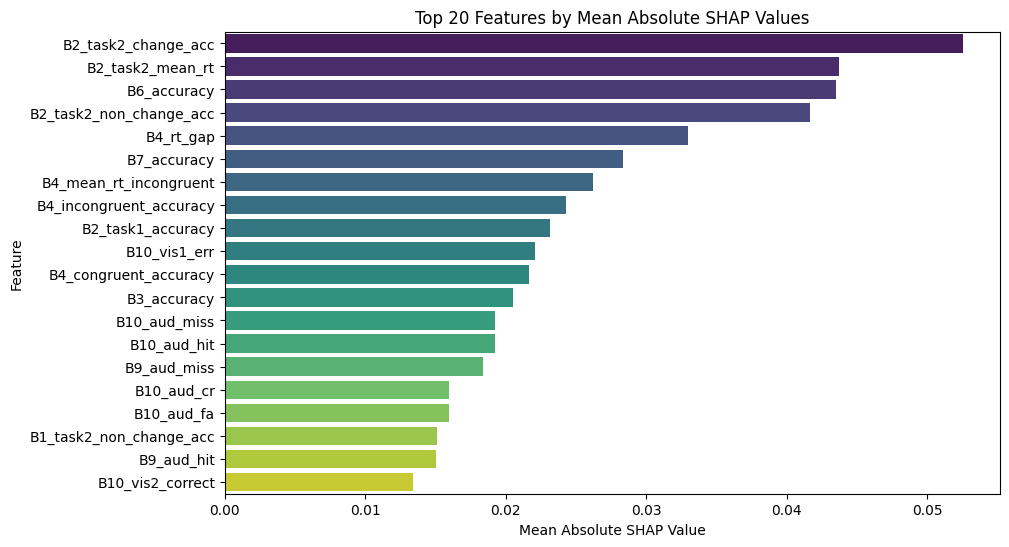

In [54]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(x_train_res, y_train_res)

# Feature importance (coefficients)
logreg_importance = pd.Series(np.abs(logreg.coef_[0]), index=feature_cols).sort_values(ascending=False)
print("Logistic Regression Feature Importance:")
print(logreg_importance.head(10))

# SHAP
explainer_logreg = shap.LinearExplainer(logreg, x_train_res, feature_perturbation="interventional")
shap_values_logreg = compute_shap_with_tqdm(explainer_logreg, x_test, batch_size=500)
plot_shap_summary(shap_values_logreg, x_test)

## **Decision Tree**

Decision Tree Feature Importance:
B10_aud_miss               0.607830
B9_vis_err                 0.191374
B10_aud_hit                0.114651
B1_task1_accuracy          0.064205
B7_accuracy                0.021133
B2_task1_accuracy          0.000808
B1_task2_change_acc        0.000000
B1_task2_non_change_acc    0.000000
B1_task2_accuracy_gap      0.000000
B1_task2_mean_rt           0.000000
dtype: float64


Computing SHAP values: 100%|██████████| 120/120 [00:00<00:00, 677.81it/s]


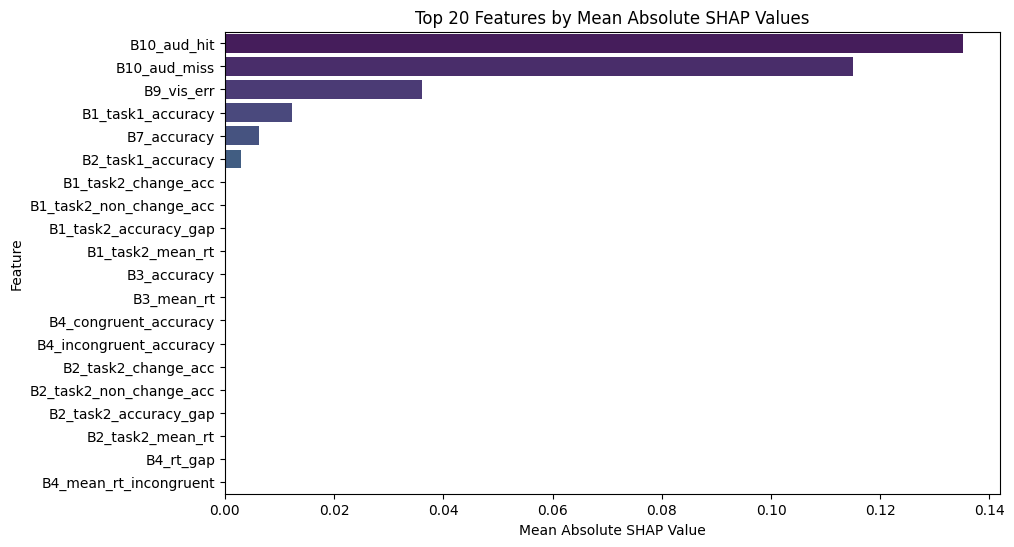

In [55]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(x_train_res, y_train_res)

# Feature importance
dtree_importance = pd.Series(dtree.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("Decision Tree Feature Importance:")
print(dtree_importance.head(10))

# SHAP
explainer_tree = shap.TreeExplainer(dtree)
shap_values_tree_all = compute_shap_with_tqdm(explainer_tree, x_test, batch_size=500)

# 클래스 1만 선택
if shap_values_tree_all.ndim == 3:
    shap_values_tree = shap_values_tree_all[:, :, 1]
else:
    shap_values_tree = shap_values_tree_all

plot_shap_summary(shap_values_tree, x_test)

## **Random Forest**

Random Forest Feature Importance:
B10_aud_hit          0.123692
B10_aud_miss         0.118162
B9_vis_err           0.103103
B10_vis2_correct     0.094769
B1_task1_accuracy    0.078965
B6_accuracy          0.076260
B9_aud_fa            0.056145
B9_aud_cr            0.052772
B5_accuracy          0.049894
B2_task1_accuracy    0.047096
dtype: float64


Computing SHAP values: 100%|██████████| 120/120 [12:02<00:00,  6.02s/it]


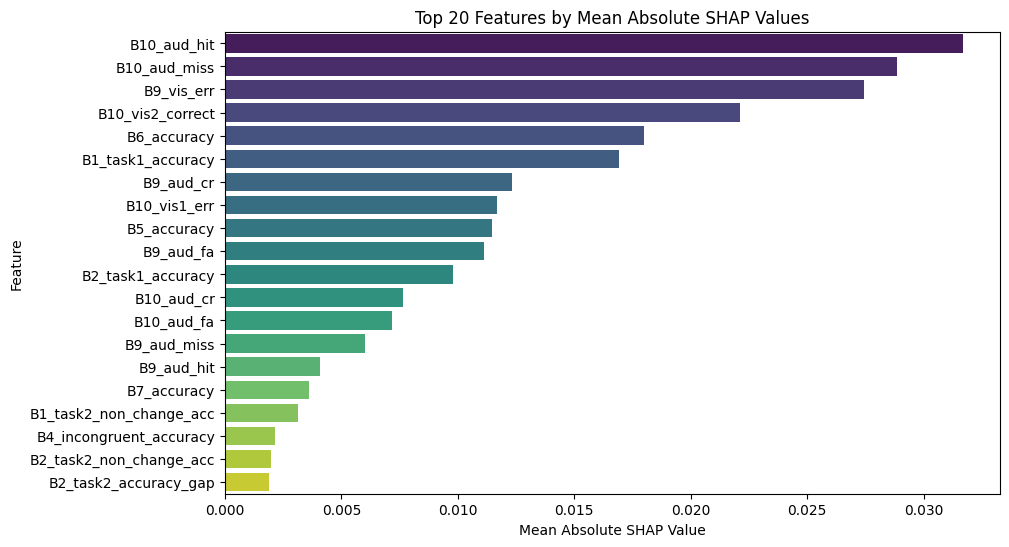

In [61]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(x_train_res, y_train_res)

# Feature Importance
rf_importance = pd.Series(rf_model.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("Random Forest Feature Importance:")
print(rf_importance.head(10))

# SHAP
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf_all = compute_shap_with_tqdm(explainer_rf, x_test, batch_size=500)

# 클래스 1만 선택
if shap_values_rf_all.ndim == 3:
    shap_values_rf = shap_values_rf_all[:, :, 1]
else:
    shap_values_rf = shap_values_rf_all

plot_shap_summary(shap_values_rf, x_test)

## **XGBoost**

XGBoost Feature Importance:
B10_aud_miss         0.113478
B6_accuracy          0.093706
B9_vis_err           0.089610
B10_vis2_correct     0.086806
B1_task1_accuracy    0.075553
B10_aud_hit          0.074929
B2_task1_accuracy    0.067766
B5_accuracy          0.061186
B10_aud_fa           0.060204
B9_aud_cr            0.056943
dtype: float32


Computing SHAP values: 100%|██████████| 120/120 [00:05<00:00, 21.96it/s]


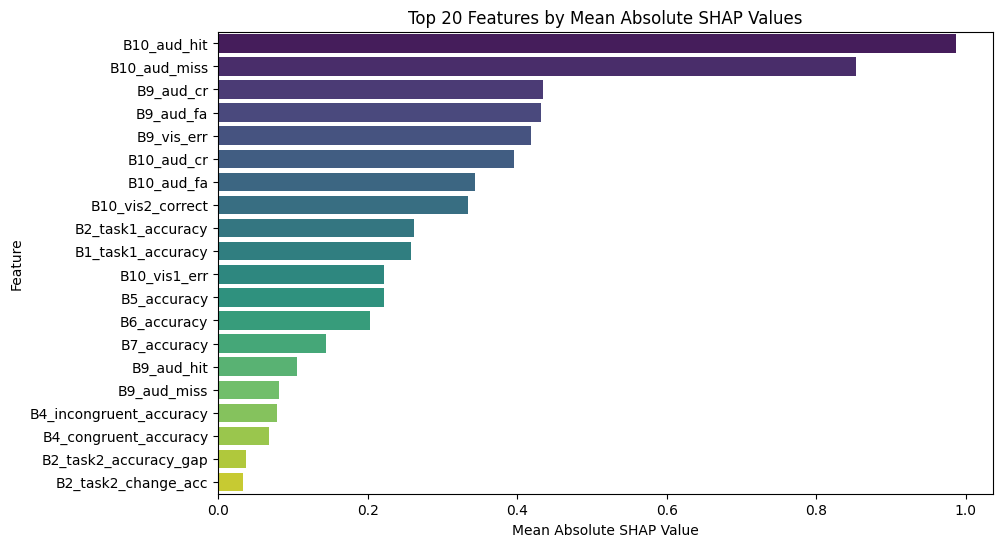

In [56]:
xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    tree_method='gpu_hist',
    gpu_id=0,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(x_train_res, y_train_res)

# Feature importance
xgb_importance = pd.Series(xgb_model.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("XGBoost Feature Importance:")
print(xgb_importance.head(10))

# SHAP
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = compute_shap_with_tqdm(explainer_xgb, x_test, batch_size=500)
plot_shap_summary(shap_values_xgb, x_test)

## **LightGBM**

LightGBM Feature Importance:
B9_vis_err           1387
B10_vis2_correct     1158
B10_vis1_err          992
B10_aud_hit           834
B2_task1_accuracy     775
B1_task1_accuracy     718
B7_accuracy           706
B6_accuracy           616
B5_mean_rt            559
B5_accuracy           551
dtype: int32


Computing SHAP values: 100%|██████████| 120/120 [00:25<00:00,  4.62it/s]


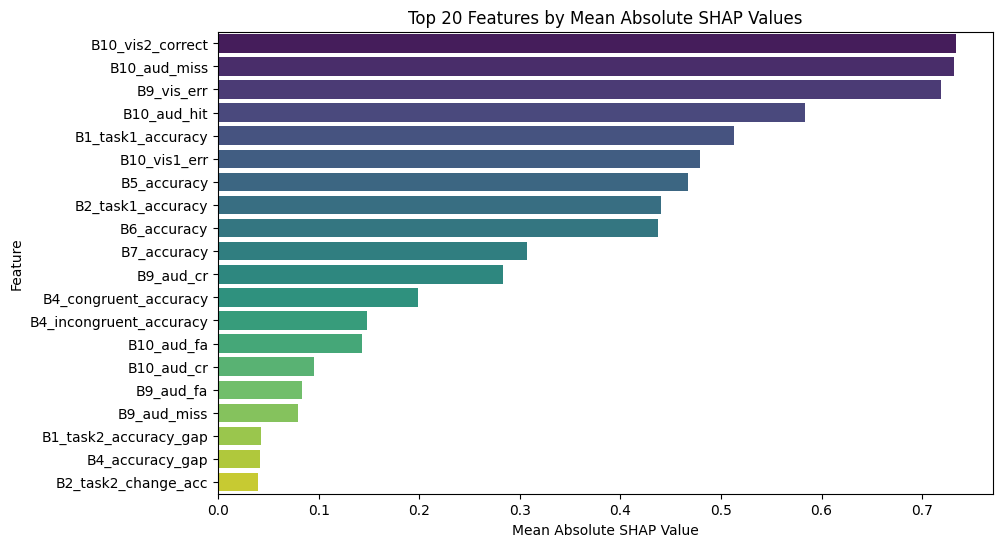

In [57]:
lgb_model = LGBMClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    device='gpu',
    random_state=42,
    verbose=-1
)
lgb_model.fit(x_train_res, y_train_res)

# Feature importance
lgb_importance = pd.Series(lgb_model.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("LightGBM Feature Importance:")
print(lgb_importance.head(10))

# SHAP
explainer_lgb = shap.TreeExplainer(lgb_model)
shap_values_lgb = compute_shap_with_tqdm(explainer_lgb, x_test, batch_size=500)
plot_shap_summary(shap_values_lgb, x_test)

## **DNN**

In [58]:
input_dim = x_train_res.shape[1]

model = Sequential([
    Dense(128, input_dim=input_dim, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x_train_res.values,
    y_train_res.values,
    epochs=500,          # 충분히 학습할 수 있도록 늘림
    batch_size=1024,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6217 - loss: 0.6553 - val_accuracy: 0.1547 - val_loss: 0.8976
Epoch 2/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6463 - loss: 0.6248 - val_accuracy: 0.4349 - val_loss: 0.7616
Epoch 3/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6684 - loss: 0.6043 - val_accuracy: 0.3401 - val_loss: 0.8836
Epoch 4/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6910 - loss: 0.5830 - val_accuracy: 0.3317 - val_loss: 0.9236
Epoch 5/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7024 - loss: 0.5673 - val_accuracy: 0.4764 - val_loss: 0.8031
Epoch 6/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7132 - loss: 0.5531 - val_accuracy: 0.5104 - val_loss: 0.7680
Epoch 7/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7237 - loss: 0.5397 - val_accuracy: 0.5535 - val_loss: 0.7369
Epoch 8/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7307 - loss: 0.5306 - val_accu

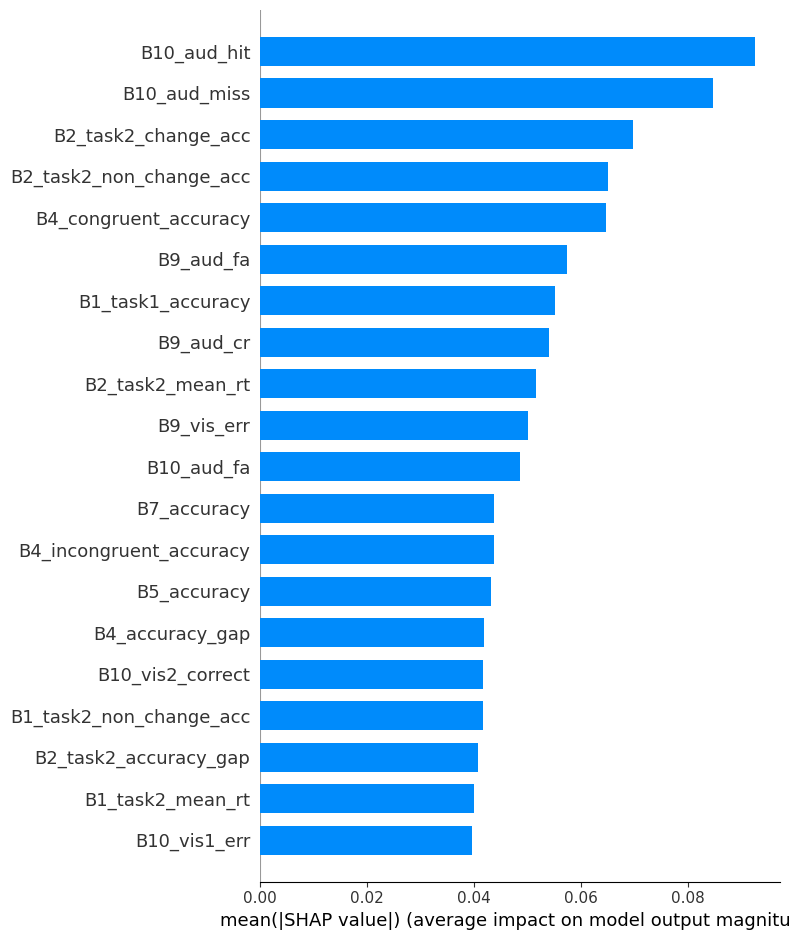

In [59]:
explainer = shap.DeepExplainer(model, x_train_res[:1000].values)
shap_values_ = explainer.shap_values(x_test[:1000].values)

# 3차원 -> 2차원 변환
shap_values_2d = shap_values_[:,:,0]

# pandas DataFrame 생성
x_test_df = pd.DataFrame(x_test[:1000].values, columns=feature_cols)

# summary_plot - 평균 절댓값 막대 그래프
shap.summary_plot(
    shap_values_2d,
    x_test_df,
    plot_type="bar",
    max_display=20
)